# Entrenament SVM: lineal

In [1]:
# Uncomment to upgrade packages
# !pip install pandas --user --upgrade --quiet
# !pip install numpy --user --upgrade --quiet
# !pip install scipy --user --upgrade --quiet
# !pip install statsmodels --user --upgrade --quiet
# !pip install seaborn --user --upgrade --quiet
# !pip install scikit-learn --user --upgrade --quiet

%load_ext autoreload

In [2]:
#%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter
from IPython.core.interactiveshell import InteractiveShell
import warnings


InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.precision', 3)
sns.set()
warnings.filterwarnings('ignore')

In [3]:
# extra imports
from pandas import read_csv
from sklearn.svm import SVC
from pandas.plotting import scatter_matrix
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [4]:
#llegir dades
Train_subset = read_csv("train_svm.csv", index_col=0, delimiter=';')
Val_subset = read_csv("val_svm.csv", index_col=0, delimiter=';')

y_train = read_csv("y_train.csv", index_col=0, delimiter=';')
y_val = read_csv("y_val.csv", index_col=0, delimiter=';')


## Escollir paràmetres

In [5]:
C = [(1/10**p) for p in range(-4,5)]
kernel = ["linear"]
hyperparameters = dict(C=C, kernel=kernel)

### Optimització de hyperparàmetres mitjançant Cross-Validation amb els paràmetres escollits

In [6]:
clf = SVC()

clf = GridSearchCV(clf, hyperparameters, cv=4, scoring='recall')

clf=clf.fit(Train_subset, y_train)

train_predictions=clf.predict(Train_subset)

## Resultats de les mètriques

In [7]:
print(clf.best_score_)

0.821900826446281


In [8]:
result = pd.DataFrame(clf.cv_results_)

## Hyperparàmetres escollits

In [9]:
print(clf.best_estimator_)

SVC(C=10000.0, kernel='linear')


In [10]:
print('Best C:', clf.best_estimator_.get_params()['C'])
# print('Best gamma:', clf.best_estimator_.get_params()['gamma'])

Best C: 10000.0


# Validation fix

In [11]:
# entrenem amb els parametres escollits
best_clf = SVC(C=clf.best_estimator_.get_params()['C'], kernel='linear')
best_clf.fit(Train_subset, y_train)

SVC(C=10000.0, kernel='linear')

In [12]:
# prediccio i metriques
y_preds  = best_clf.predict(Val_subset)


print(metrics.classification_report(y_val, y_preds))

              precision    recall  f1-score   support

           0       0.85      0.75      0.80       330
           1       0.78      0.87      0.82       329

    accuracy                           0.81       659
   macro avg       0.81      0.81      0.81       659
weighted avg       0.81      0.81      0.81       659



In [13]:
metrics.confusion_matrix(y_val, y_preds)

array([[248,  82],
       [ 44, 285]], dtype=int64)

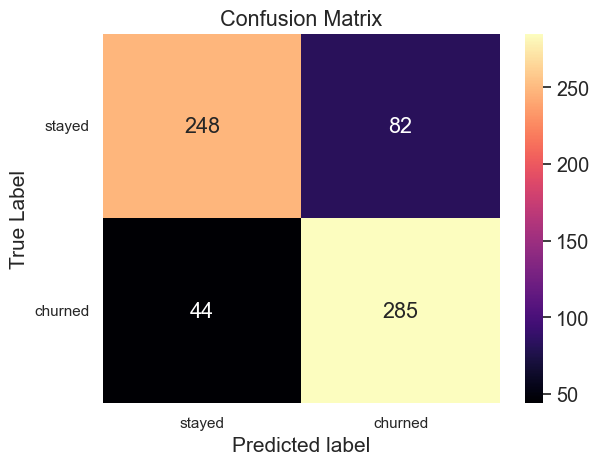

<Figure size 1000x700 with 0 Axes>

In [14]:
matrix = metrics.confusion_matrix(y_val,  
                                            y_preds)#turn this into a dataframe

labels = ['stayed', 'churned']  
matrix_df = pd.DataFrame(matrix)#plot the result
ax = plt.axes()
_ = sns.set(font_scale=1.3)
_ = plt.figure(figsize=(10,7))
_ = sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")#set axis titles
_ = ax.set_title('Confusion Matrix')
_ = ax.set_xlabel("Predicted label", fontsize =15)
_ = ax.set_xticklabels(labels)
_ = ax.set_ylabel("True Label", fontsize=15)
_ = ax.set_yticklabels(labels, rotation = 0)
_ = plt.show()